# Homework 4 starter example
See the assignment PDF for details on the assignment itself; this is just an example of the kinds of things you can do to get you started.


Let's start by loading the libraries we'll need, and then loading the dataset itself

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_excel('partnerPrefs.xlsx')

Now we'll take a look at what's in the file in a few different ways:

In [8]:
data.head()

Unweighted_Sample  Weighted_Sample               Question Nationality  \
0                454              530  They are good looking    American   
1                454              530  They are good looking    American   
2                454              530  They are good looking    American   
3                454              530  They are good looking    American   
4                454              530  They are good looking    American   

  Gender    Rank (text)  Rank (number)  Percentage  
0    Men   Ranked first              1        0.18  
1    Men  Ranked second              2        0.13  
2    Men   Ranked third              3        0.16  
3    Men  Ranked fourth              4        0.19  
4    Men   Ranked fifth              5        0.25

In [6]:
data.Question.unique()

array(['They are good looking', 'They have a personality I like',
       'They have a sense of humour I like', 'They are intelligent',
       'They have/make a decent amount of money',
       'They have similar interests to me'], dtype=object)

In [7]:
data.Nationality.unique()

array(['American', 'Arabian', 'Australian', 'British', 'Danish',
       'Egyptian', 'Filipino', 'Finnish', 'French', 'German', 'Hong Kong',
       'Indian', 'Indonesian', 'Malaysian', 'Norwegian', 'Singaporean',
       'Swedish', 'Thai', 'UAE', 'Vietnamese'], dtype=object)

## Now for some plots
Let's pull out one specific question and make a bar plot to break down the results by gender:

In [8]:
looks = data[data.Question == 'They are good looking']
looksPrefs = looks.pivot_table(['Percentage'], index=['Rank (number)'], columns='Gender')
looksPrefs

Percentage        
Gender               Men   Women
Rank (number)                   
1                 0.2330  0.1040
2                 0.1645  0.0905
3                 0.1735  0.1185
4                 0.1625  0.1660
5                 0.1980  0.2965
6                 0.0685  0.2270

<IPython.core.display.Javascript object>


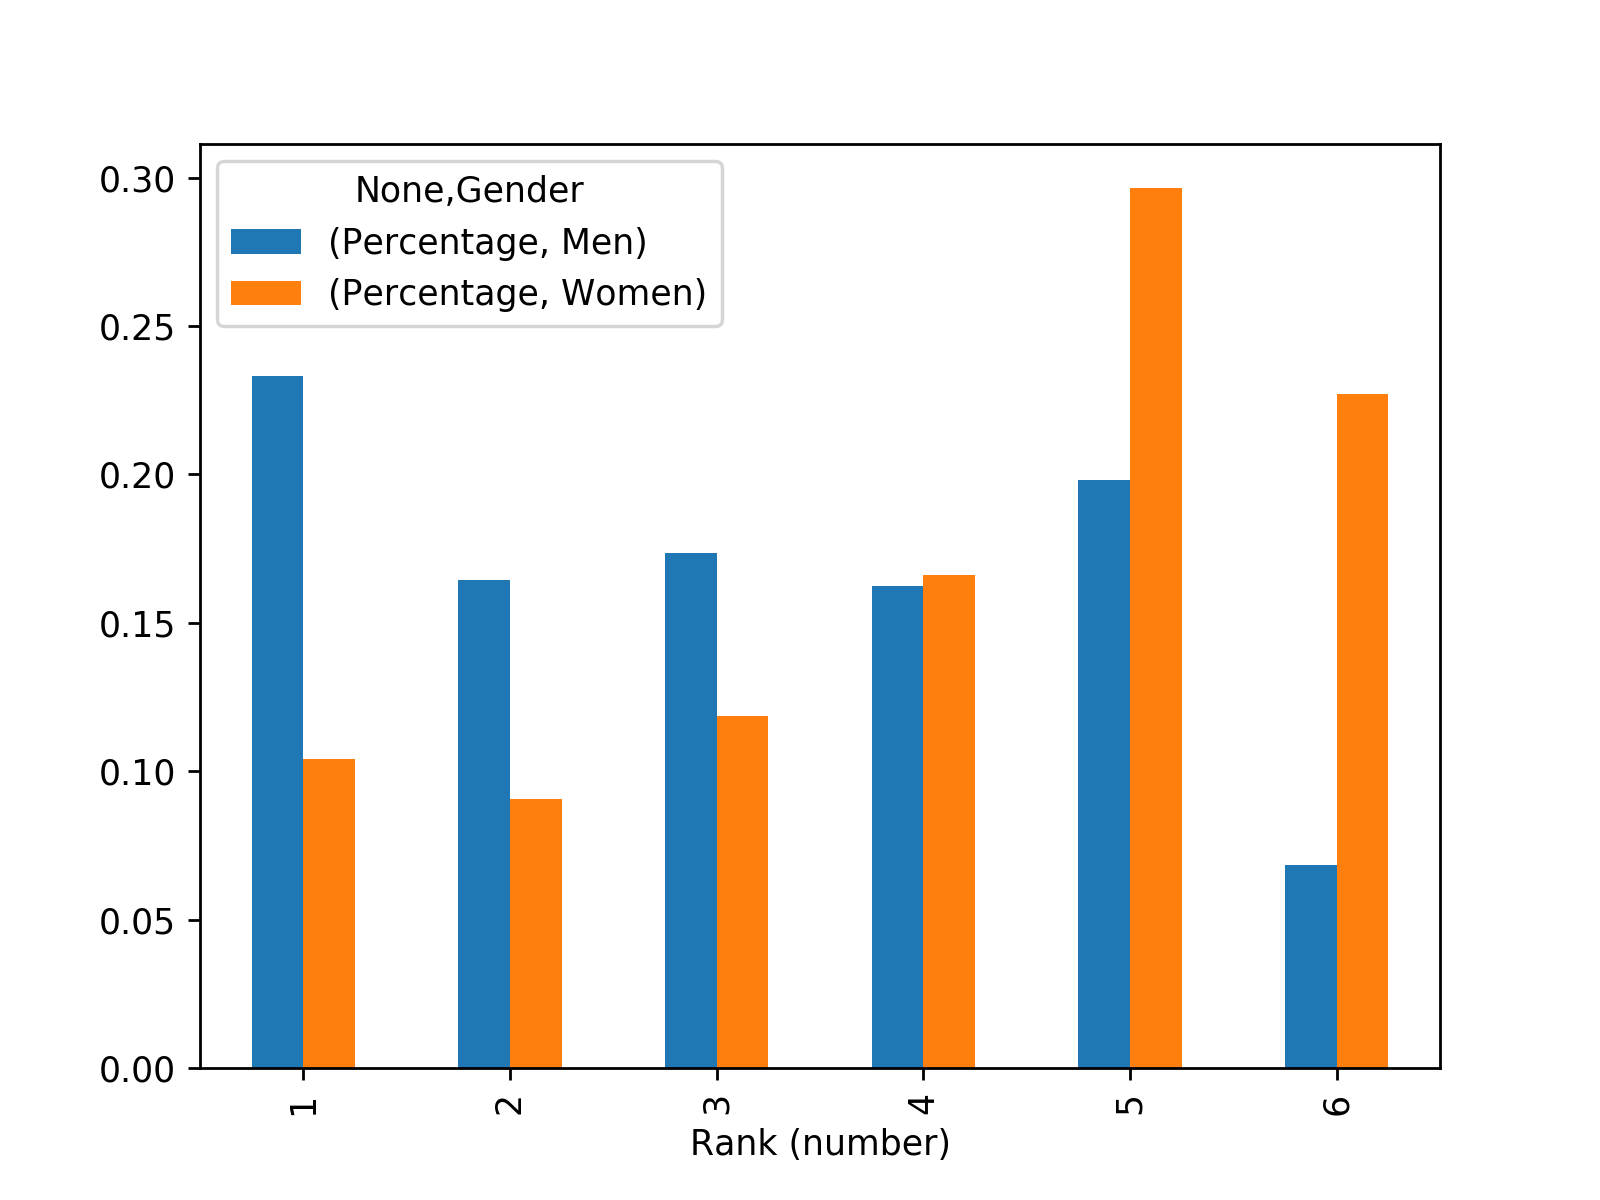

In [9]:
looksPrefs.plot.bar()

## Well, it's a start
The plot does seem to show that not many people rank looks as their top requirement, and that women are even less likely to do so than men.  Unfortunately, it's hard to actually tell that just from the graph, because it doesn't have useful labels on anything.  Let's try to do better:

In [ ]:
# this changes the color palette to something nicer; google "seaborn color palette" to find others
sns.set_palette("Paired")

# make the plot, then set some titels and labels
looksPrefs.plot.bar()
plt.title("Ranking of the importance of looks, broken down by gender")
plt.xlabel('Rank of "they are good looking"')
plt.ylabel('Percentage')


## Better, but it's still just a start
This only tells us about one question, and only as a global aggregate.  Let's look at another question for a particular country:

In [10]:
personality = data[data.Question == 'They have a personality I like']
personalityPrefs = personality[personality.Nationality == 'American'].pivot_table(['Percentage'], index=['Rank (number)'], columns='Gender')

<IPython.core.display.Javascript object>


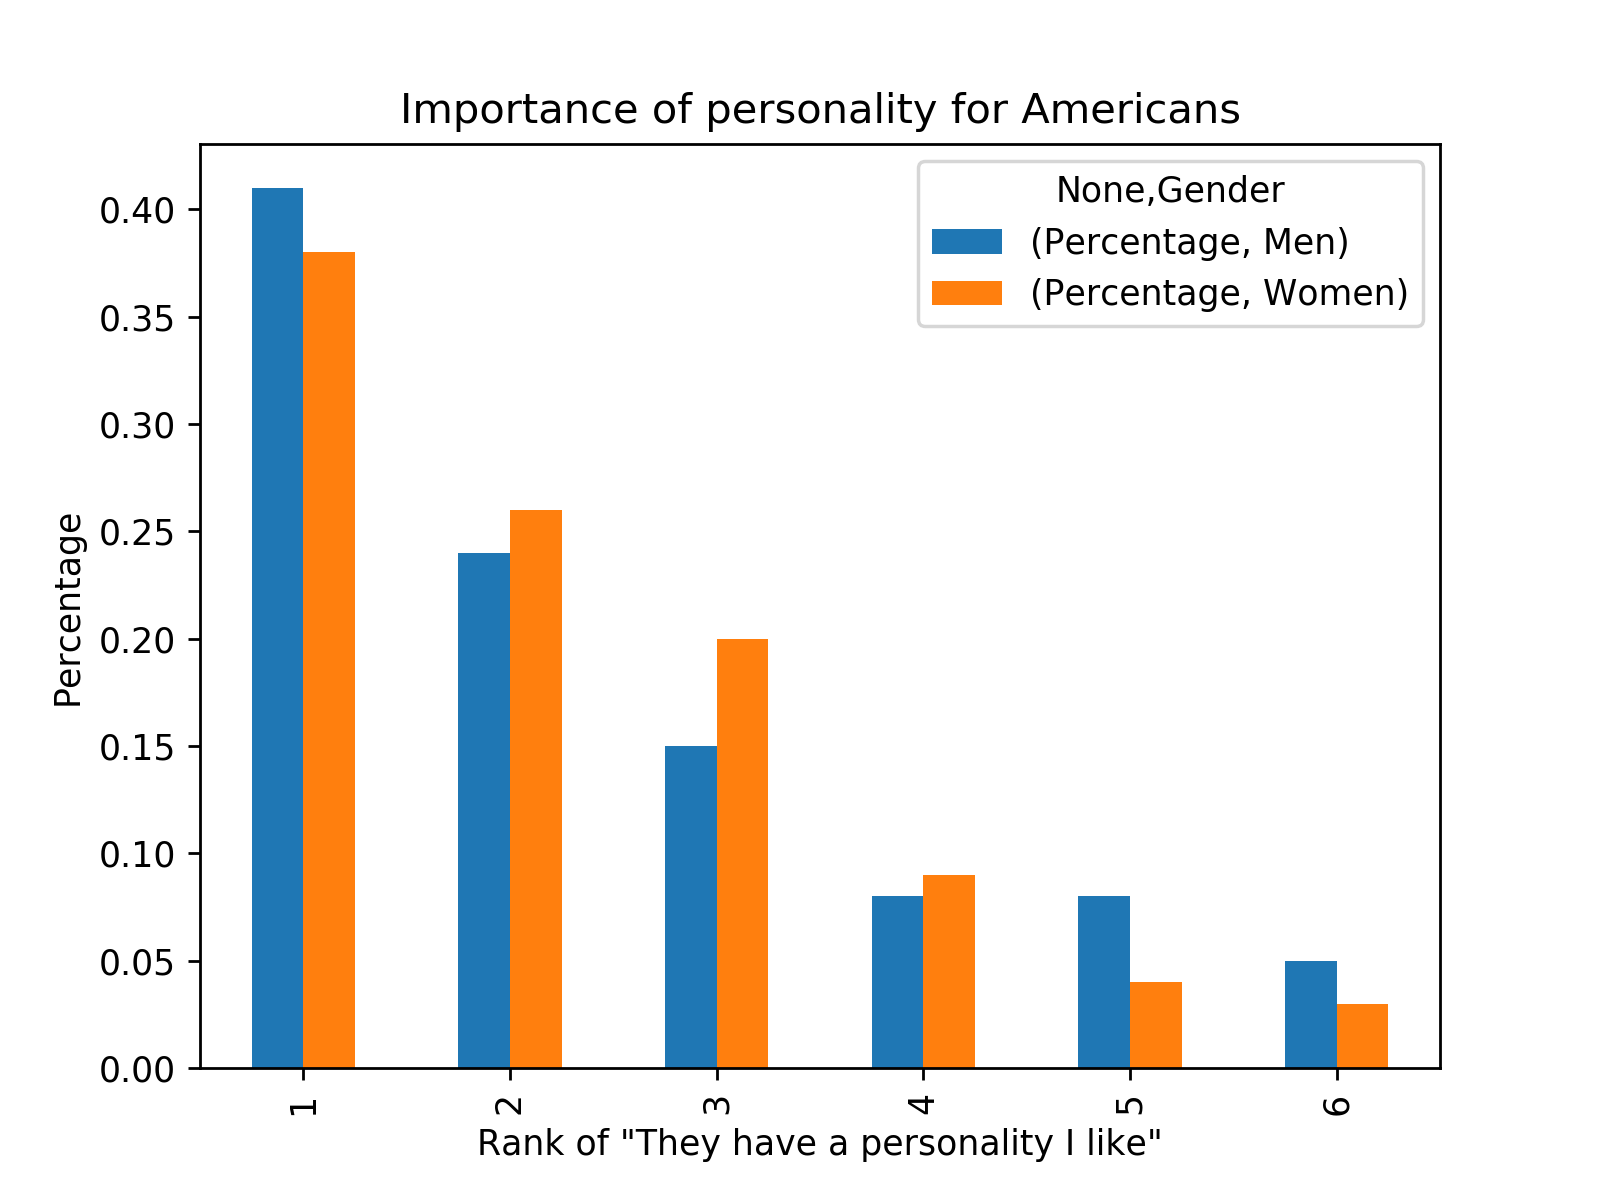

Text(0,0.5,'Percentage')

In [11]:
personalityPrefs.plot.bar()
plt.title("Importance of personality for Americans")
plt.xlabel('Rank of "They have a personality I like"')
plt.ylabel('Percentage')

## Let's do a comparison
We can make the same plot for the UK and see how they compare

<IPython.core.display.Javascript object>


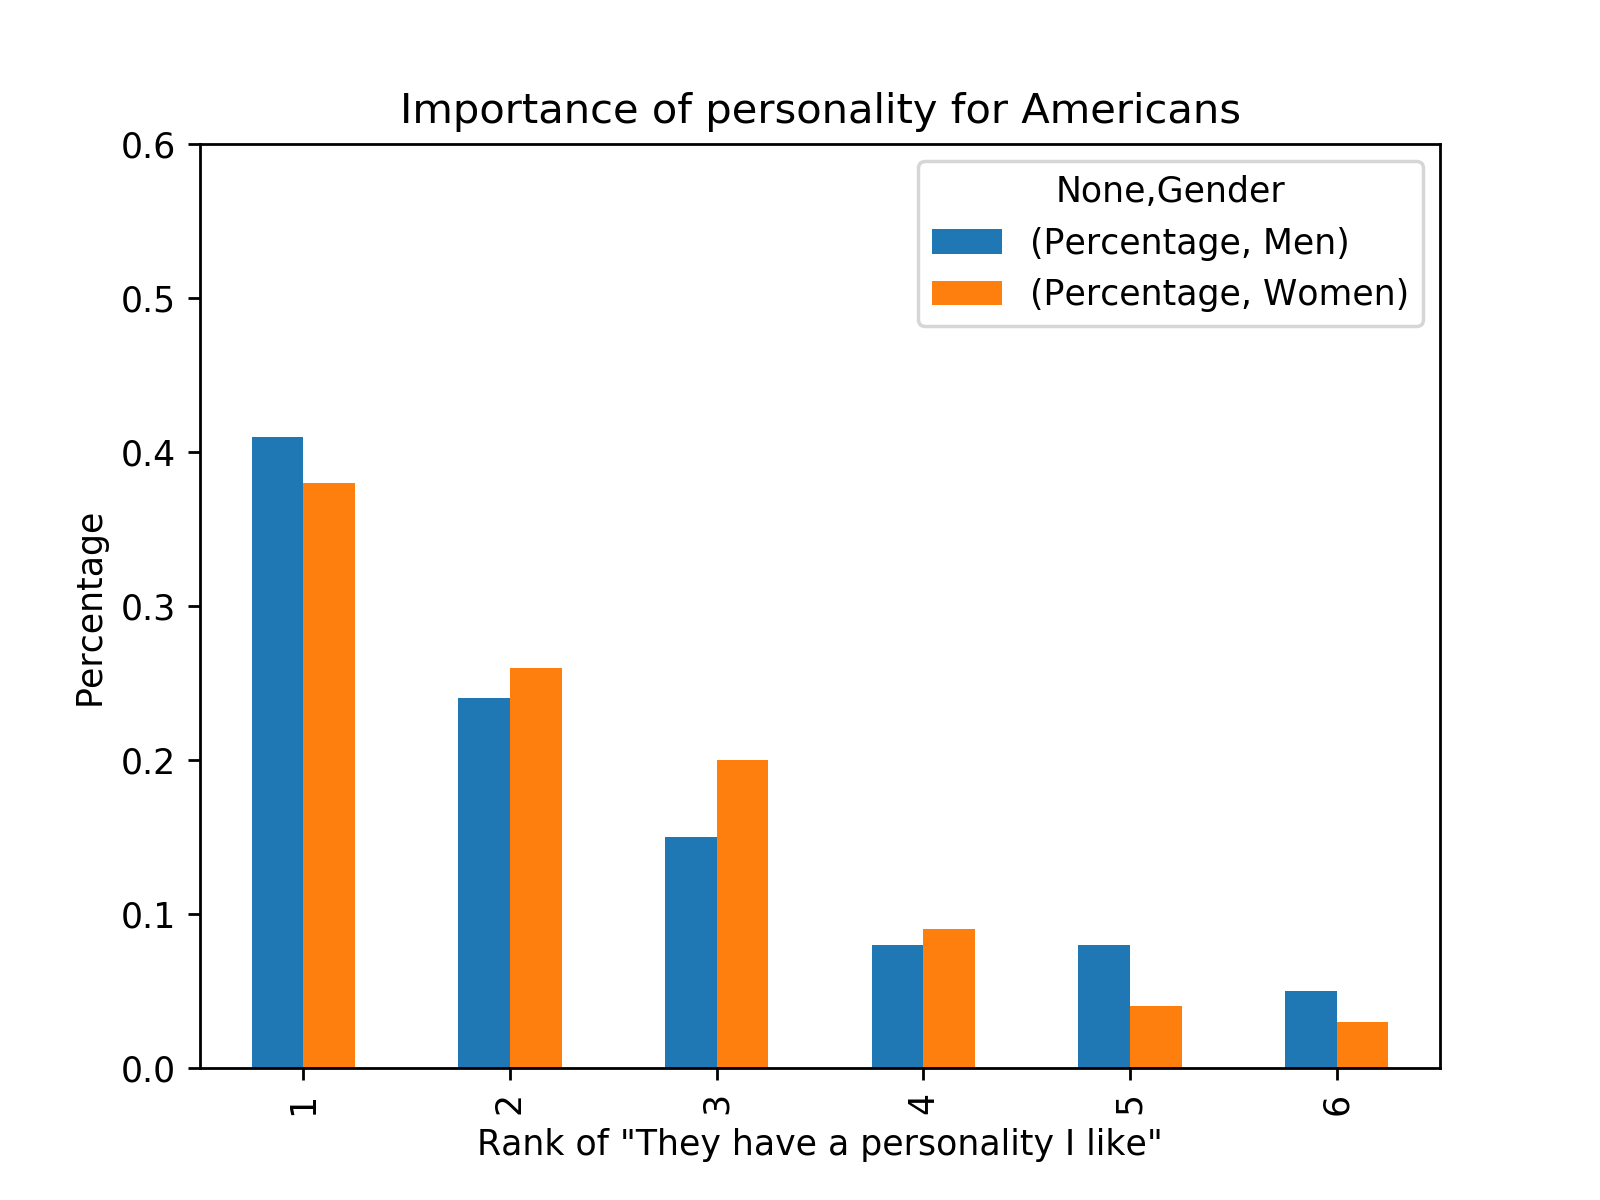

<IPython.core.display.Javascript object>


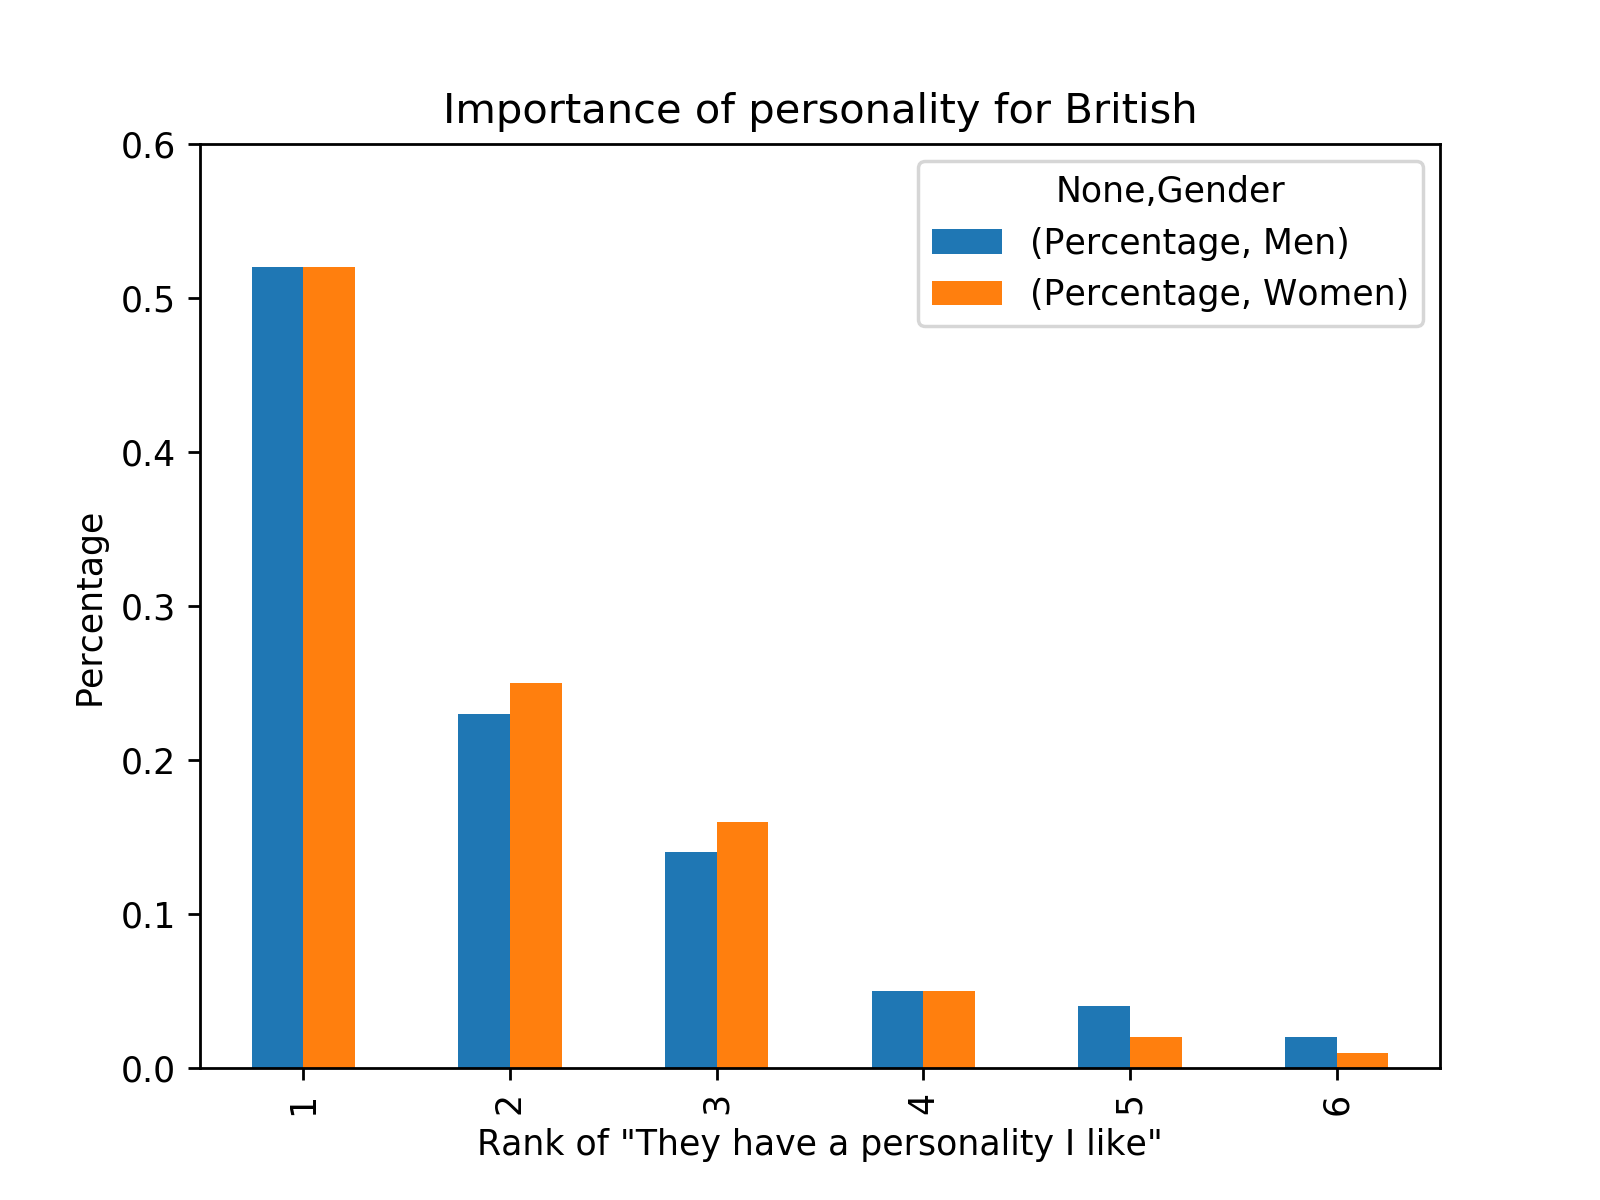

(0, 0.6)

In [12]:

personalityPrefsA = personality[personality.Nationality == 'American'].pivot_table(['Percentage'], index=['Rank (number)'], columns='Gender')
personalityPrefsB = personality[personality.Nationality == 'British'].pivot_table(['Percentage'], index=['Rank (number)'], columns='Gender')
personalityPrefsA.plot.bar()
plt.title("Importance of personality for Americans")
plt.xlabel('Rank of "They have a personality I like"')
plt.ylabel('Percentage')
plt.ylim(0,0.6)

personalityPrefsB.plot.bar()
plt.title("Importance of personality for British")
plt.xlabel('Rank of "They have a personality I like"')
plt.ylabel('Percentage')
plt.ylim(0,0.6)

# Remember to tell a story
There's probably a story you could tell from just these two graphs, but it's probably not the most interesting story you could tell using this data...

In [12]:
looks = data[data.Question == 'They are good looking']
looksPrefs = looks.pivot_table(['Percentage'], index=['Rank (number)'], columns='Gender')
looksPrefs

Percentage        
Gender               Men   Women
Rank (number)                   
1                 0.2330  0.1040
2                 0.1645  0.0905
3                 0.1735  0.1185
4                 0.1625  0.1660
5                 0.1980  0.2965
6                 0.0685  0.2270

In [11]:
personality = data[data.Question == 'They have a personality I like']
personalityPrefs = personality.pivot_table(['Percentage'], index=['Rank (number)'], columns='Gender')
personalityPrefs

Percentage        
Gender               Men   Women
Rank (number)                   
1                 0.4360  0.4880
2                 0.2310  0.2100
3                 0.1375  0.1345
4                 0.0920  0.0840
5                 0.0645  0.0560
6                 0.0385  0.0300

<IPython.core.display.Javascript object>


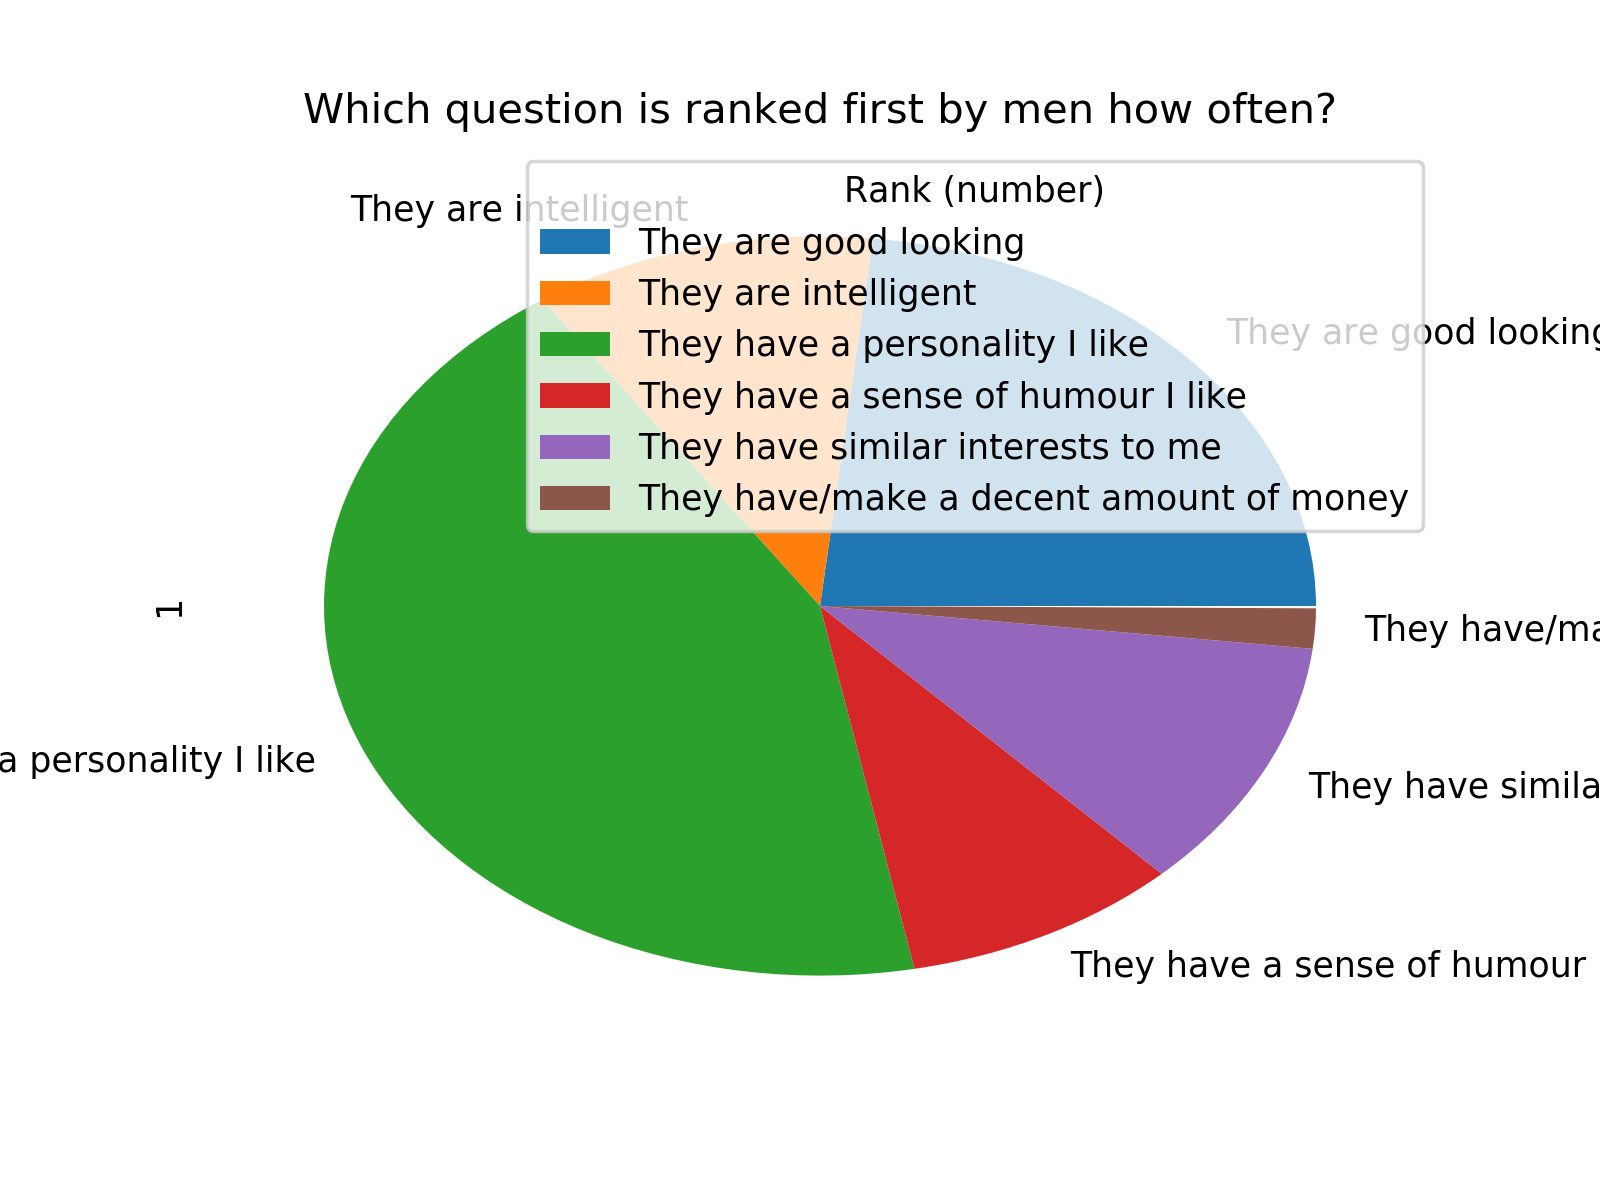

Text(0.5,1,'Which question is ranked first by men how often?')

In [44]:
#Pie chart of what percentage of people rank each question first for men
firstRanking=data[(data.Gender=='Men') & (data['Rank (number)']==1)]
firstRankingPrefs = firstRanking.pivot_table(['Percentage'], index=['Question'], columns='Rank (number)')
#firstRankingPrefs
firstRankingPrefs.plot.pie("Percentage")
plt.title("Which question is ranked first by men how often?")

<IPython.core.display.Javascript object>


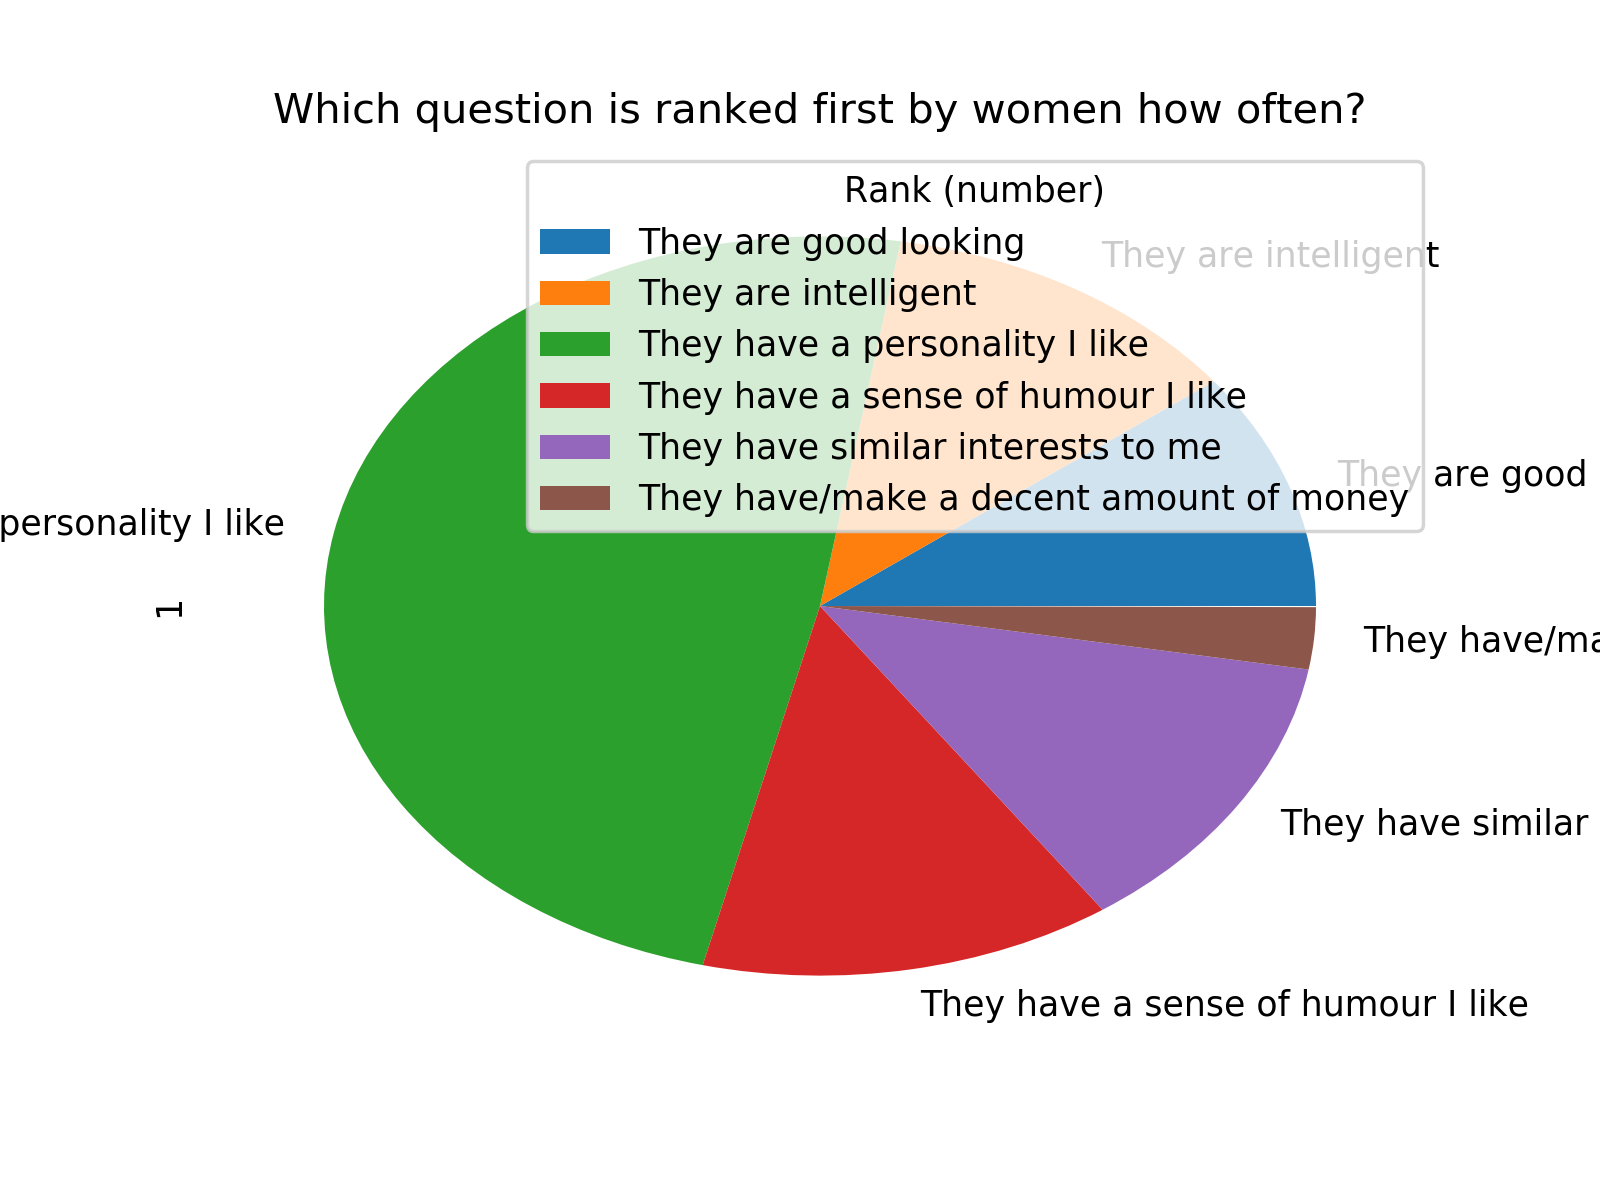

Text(0.5,1,'Which question is ranked first by women how often?')

In [48]:
#Pie chart of what percentage of people rank each question first for men
firstRanking=data[(data.Gender=='Women') & (data['Rank (number)']==1)]
firstRankingPrefs = firstRanking.pivot_table(['Percentage'], index=['Question'], columns='Rank (number)')
#firstRankingPrefs
firstRankingPrefs.plot.pie("Percentage")
plt.title("Which question is ranked first by women how often?")

<IPython.core.display.Javascript object>


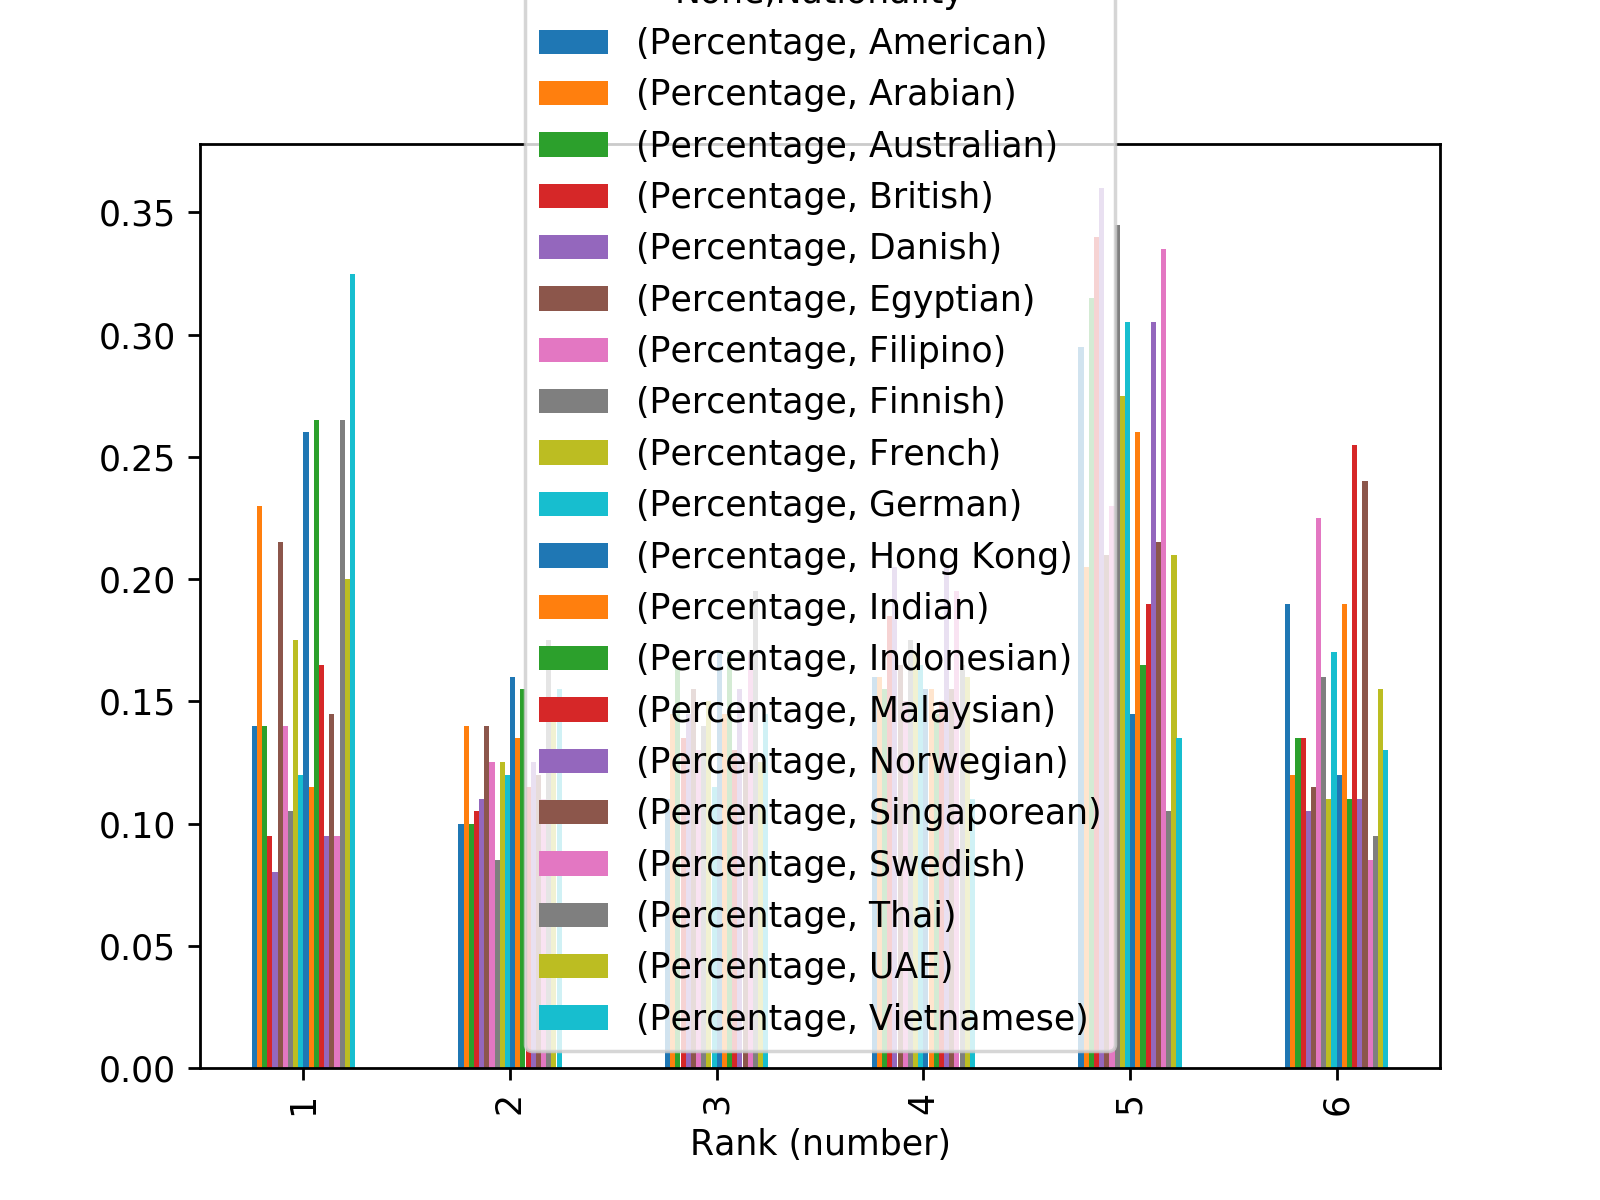

In [51]:
looksCountry = data[data.Question == 'They are good looking']
looksCountryPrefs = looksCountry.pivot_table(['Percentage'], index=['Rank (number)'], columns='Nationality')
looksCountryPrefs
looksCountryPrefs.plot.bar()